In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load patients data
d1 = files.upload()
patients = pd.read_csv('PATIENTS.csv')

Saving PATIENTS.csv to PATIENTS.csv


In [3]:
# Load admissions data
d2 = files.upload()
admissions = pd.read_csv('ADMISSIONS.csv')

Saving ADMISSIONS.csv to ADMISSIONS.csv


In [4]:
# Load diagnoses_icd data
d3 = files.upload()
diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')

Saving DIAGNOSES_ICD.csv to DIAGNOSES_ICD.csv


In [5]:
# Load ICUSTAYS data
d4 = files.upload()
icustays = pd.read_csv('ICUSTAYS.csv')

Saving ICUSTAYS.csv to ICUSTAYS.csv


In [6]:
# Load D_ICD_DIAGNOSES data
d4 = files.upload()
diagnoses_labels = pd.read_csv('D_ICD_DIAGNOSES.csv')

Saving D_ICD_DIAGNOSES.csv to D_ICD_DIAGNOSES.csv


## Patients Table

In [7]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       100 non-null    int64 
 1   subject_id   100 non-null    int64 
 2   gender       100 non-null    object
 3   dob          100 non-null    object
 4   dod          100 non-null    object
 5   dod_hosp     70 non-null     object
 6   dod_ssn      77 non-null     object
 7   expire_flag  100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [8]:
from datetime import datetime
df = patients
# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
df["age"] = df.apply(lambda row: calculate_age(row["dob"], row["dod"]), axis=1)

# Filter out rows with age greater than or equal to 120
filtered_df = df[df["age"] < 120]

# Display the updated DataFrame
print(filtered_df.head())

   row_id  subject_id gender                  dob                  dod  \
0    9467       10006      F  2094-03-05 00:00:00  2165-08-12 00:00:00   
1    9472       10011      F  2090-06-05 00:00:00  2126-08-28 00:00:00   
2    9474       10013      F  2038-09-03 00:00:00  2125-10-07 00:00:00   
3    9478       10017      F  2075-09-21 00:00:00  2152-09-12 00:00:00   
4    9479       10019      M  2114-06-20 00:00:00  2163-05-15 00:00:00   

              dod_hosp              dod_ssn  expire_flag  age  
0  2165-08-12 00:00:00  2165-08-12 00:00:00            1   71  
1  2126-08-28 00:00:00                  NaN            1   36  
2  2125-10-07 00:00:00  2125-10-07 00:00:00            1   87  
3                  NaN  2152-09-12 00:00:00            1   77  
4  2163-05-15 00:00:00  2163-05-15 00:00:00            1   48  


In [9]:
filtered_df["expire_flag"].value_counts()


,count
expire_flag,
1,92


In [10]:
filtered_df["age"].value_counts()

,count
age,
88,6
81,6
82,5
78,4
83,4
72,4
86,4
68,4
87,4


In [11]:
filtered_df["gender"].value_counts()

,count
gender,
F,50
M,42


In [12]:
filtered_df['age'].describe()

,age
count,92.000000
mean,70.608696
std,17.237167
min,20.000000
25%,65.000000
50%,77.000000
75%,83.000000
max,91.000000


In [13]:
filtered_df['age'].loc[df['gender'] == 'F'].describe()

,age
count,50.000000
mean,73.060000
std,17.219365
min,20.000000
25%,68.000000
50%,79.500000
75%,84.500000
max,91.000000


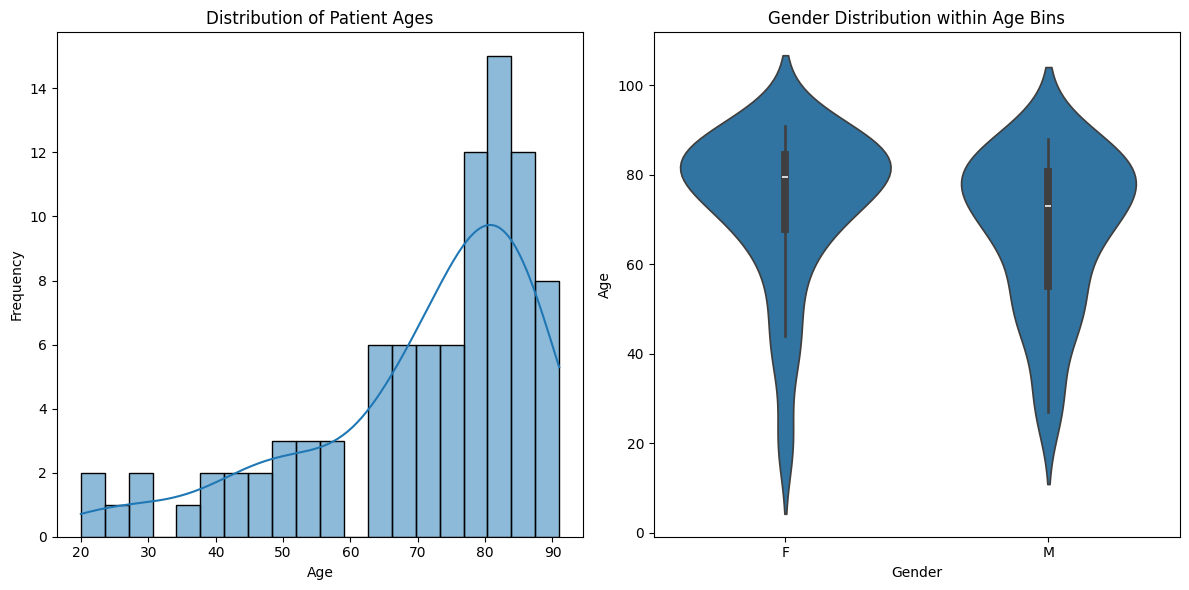

In [14]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot - Age distribution
plt.subplot(1, 2, 1)
sns.histplot(data=filtered_df, x='age', bins=20, kde=True)
plt.title("Distribution of Patient Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Second subplot - Gender distribution within each age bin
plt.subplot(1, 2, 2)
sns.violinplot(data=filtered_df, x='gender', y='age', inner='box')
plt.title("Gender Distribution within Age Bins")
plt.xlabel("Gender")
plt.ylabel("Age")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Patients and Admissions Table

In [15]:
# Merge admissions and patients data on subject_id
merged_data = pd.merge(admissions, filtered_df, on="subject_id")
merged_data.head()

,row_id_x,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,hospital_expire_flag,has_chartevents_data,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,0,1,9467,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,...,1,1,9472,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1,36
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,1,1,9474,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1,87
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,0,1,9478,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1,77
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,1,1,9479,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1,48


In [16]:
merged_data['admission_type'].value_counts()

,count
admission_type,
EMERGENCY,110
ELECTIVE,8
URGENT,2


In [17]:
merged_data['admission_location'].value_counts()

,count
admission_location,
EMERGENCY ROOM ADMIT,73
TRANSFER FROM HOSP/EXTRAM,24
CLINIC REFERRAL/PREMATURE,12
PHYS REFERRAL/NORMAL DELI,10
TRANSFER FROM SKILLED NUR,1


In [18]:
merged_data['insurance'].value_counts()

,count
insurance,
Medicare,89
Private,24
Medicaid,6
Government,1


In [19]:
merged_data['discharge_location'].value_counts()

,count
discharge_location,
SNF,37
DEAD/EXPIRED,36
HOME,14
HOME HEALTH CARE,13
REHAB/DISTINCT PART HOSP,12
ICF,3
LONG TERM CARE HOSPITAL,2
HOSPICE-HOME,1
HOME WITH HOME IV PROVIDR,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HOME HEALTH CARE'),
  Text(1, 0, 'DEAD/EXPIRED'),
  Text(2, 0, 'SNF'),
  Text(3, 0, 'REHAB/DISTINCT PART HOSP'),
  Text(4, 0, 'HOME'),
  Text(5, 0, 'HOSPICE-HOME'),
  Text(6, 0, 'DISCH-TRAN TO PSYCH HOSP'),
  Text(7, 0, 'HOME WITH HOME IV PROVIDR'),
  Text(8, 0, 'LONG TERM CARE HOSPITAL'),
  Text(9, 0, 'ICF')])

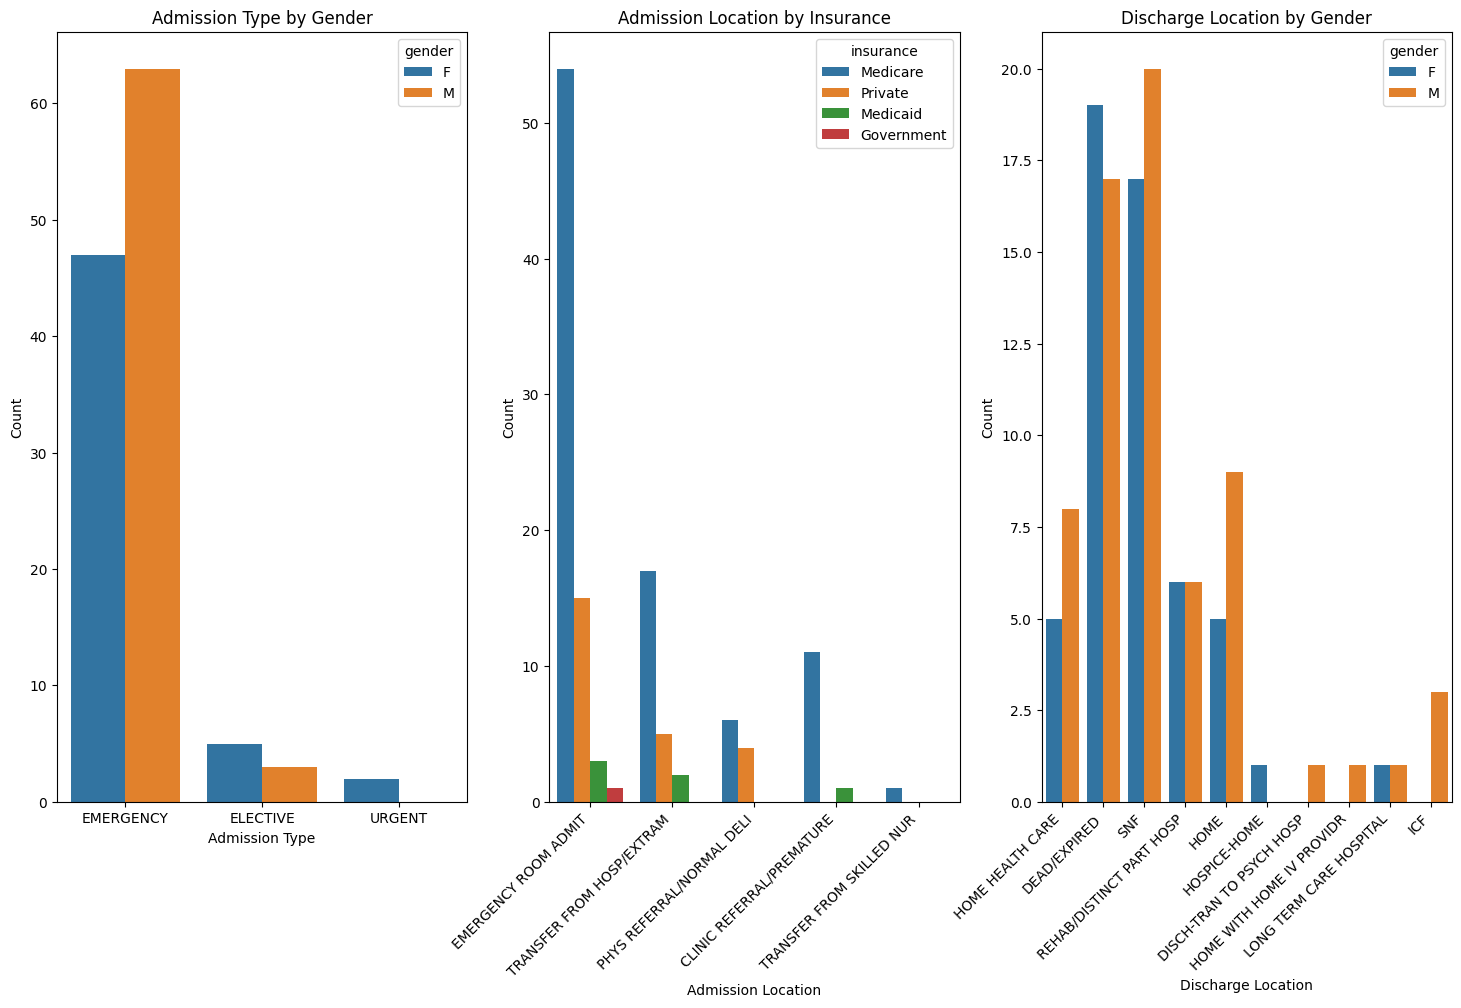

In [25]:
# Create a complex visualization
plt.figure(figsize=(18, 10))

# Analysis 1: Count plot of Admission Types by Gender
plt.subplot(1, 3, 1)
sns.countplot(data=merged_data, x='admission_type', hue='gender')
plt.title("Admission Type by Gender")
plt.xlabel("Admission Type")
plt.ylabel("Count")

# Analysis 2: Count plot of Admission Locations by Insurance
plt.subplot(1, 3, 2)
sns.countplot(data=merged_data, x='admission_location', hue='insurance')
plt.title("Admission Location by Insurance")
plt.xlabel("Admission Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Analysis 3: Count plot of Discharge Locations by Gender
plt.subplot(1, 3, 3)
sns.countplot(data=merged_data, x='discharge_location', hue='gender')
plt.title("Discharge Location by Gender")
plt.xlabel("Discharge Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

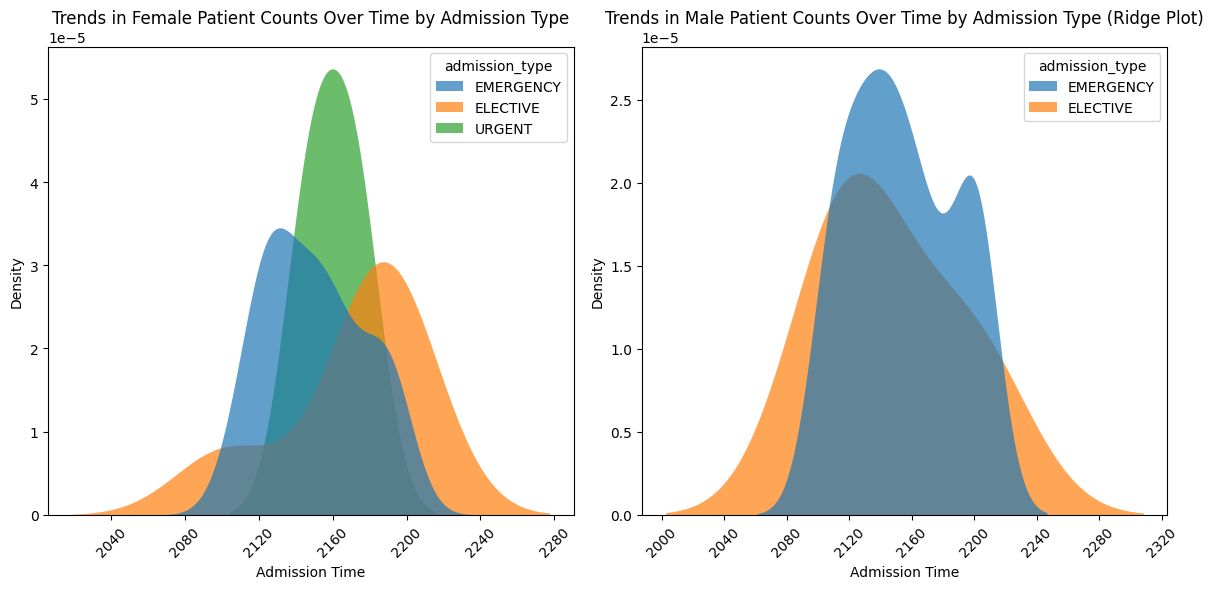

In [24]:
merged_data['admittime'] = pd.to_datetime(merged_data['admittime'])  # Convert to datetime

# Filter data for male and female patients
male_data = merged_data[merged_data['gender'] == 'M']
female_data = merged_data[merged_data['gender'] == 'F']

# Create separate Ridge Plots for male and female patients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=female_data, x='admittime', hue='admission_type', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='Female')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Trends in Female Patient Counts Over Time by Admission Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.kdeplot(data=male_data, x='admittime', hue='admission_type', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='Male')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Trends in Male Patient Counts Over Time by Admission Type (Ridge Plot)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Different types of plots that convey same information

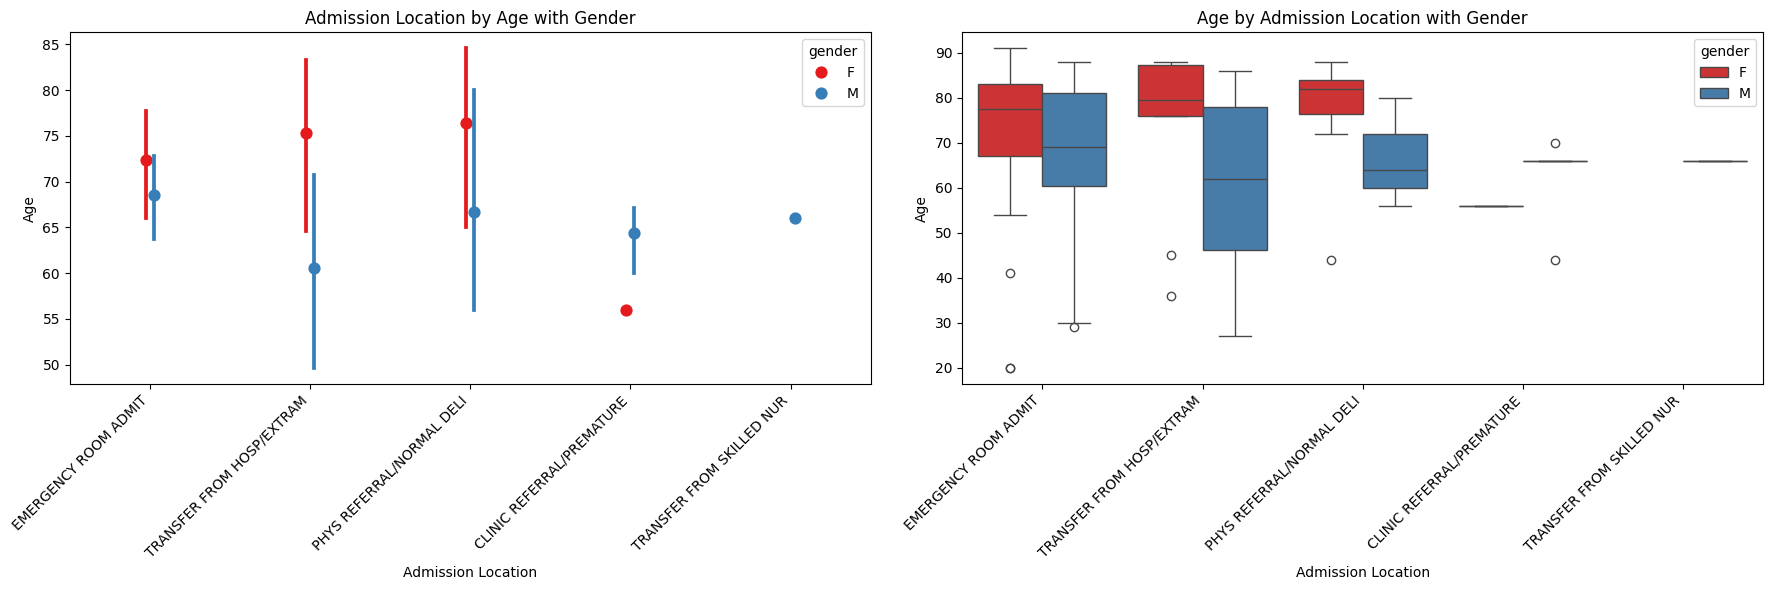

In [21]:
# Create a complex visualization using subplots
plt.figure(figsize=(18, 6))

# Point plot of Admission Location by Age with Gender color hue
plt.subplot(1, 2, 1)
sns.pointplot(data=merged_data, x='admission_location', y='age', hue='gender', palette='Set1', dodge=True, linestyles="")
plt.title("Admission Location by Age with Gender")
plt.xlabel("Admission Location")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')

# Box plot of Age by Admission Location with Gender color hue
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data, x='admission_location', y='age', hue='gender', palette='Set1')
plt.title("Age by Admission Location with Gender")
plt.xlabel("Admission Location")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
merged_data['religion'].value_counts()

,count
religion,
CATHOLIC,58
NOT SPECIFIED,19
UNOBTAINABLE,16
PROTESTANT QUAKER,9
JEWISH,7
CHRISTIAN SCIENTIST,3
OTHER,3
MUSLIM,2
BUDDHIST,1


In [23]:
merged_data['ethnicity'].value_counts()

,count
ethnicity,
WHITE,80
HISPANIC/LATINO - PUERTO RICAN,15
UNKNOWN/NOT SPECIFIED,10
BLACK/AFRICAN AMERICAN,5
OTHER,3
ASIAN,2
HISPANIC OR LATINO,2
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,2
UNABLE TO OBTAIN,1


## Heatmap

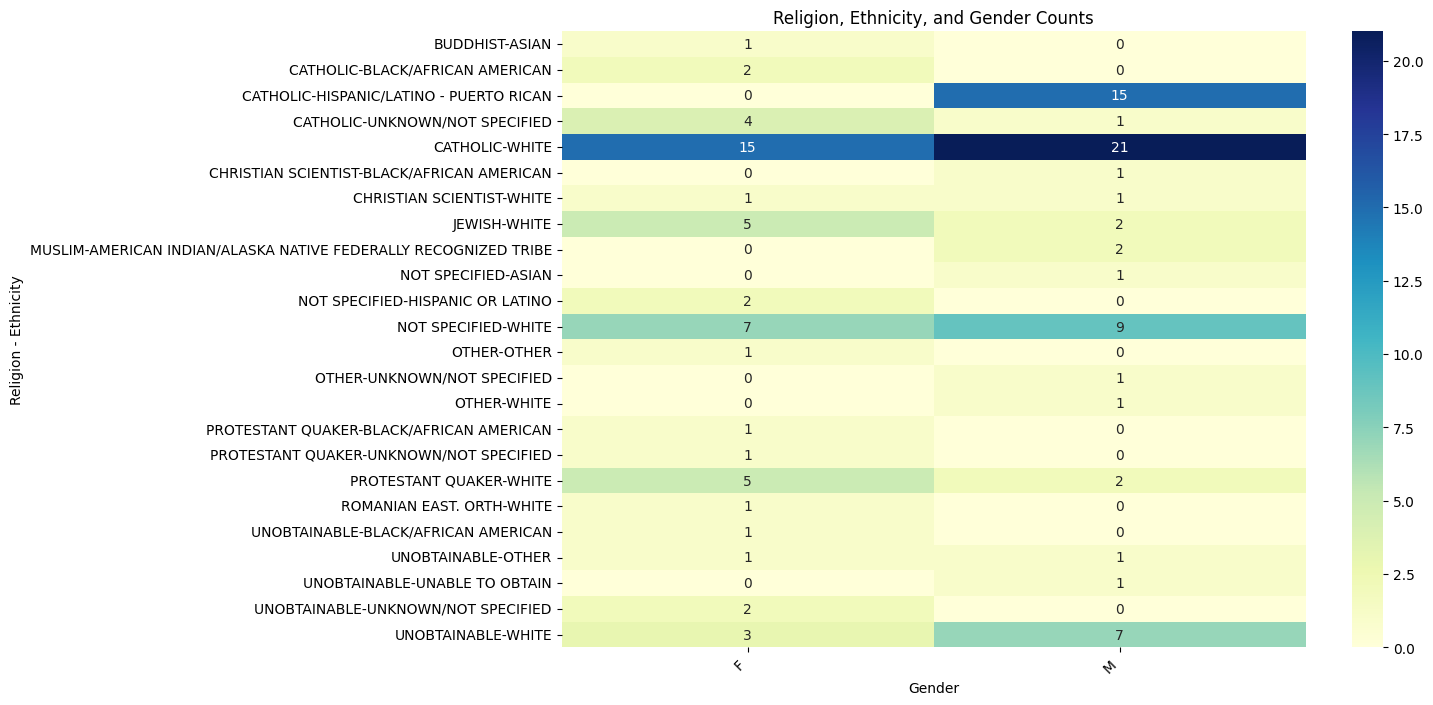

In [26]:
# Create a pivot table to prepare data for the heatmap
pivot_table = merged_data.groupby(['religion', 'ethnicity', 'gender']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Religion, Ethnicity, and Gender Counts")
plt.xlabel("Gender")
plt.ylabel("Religion - Ethnicity")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

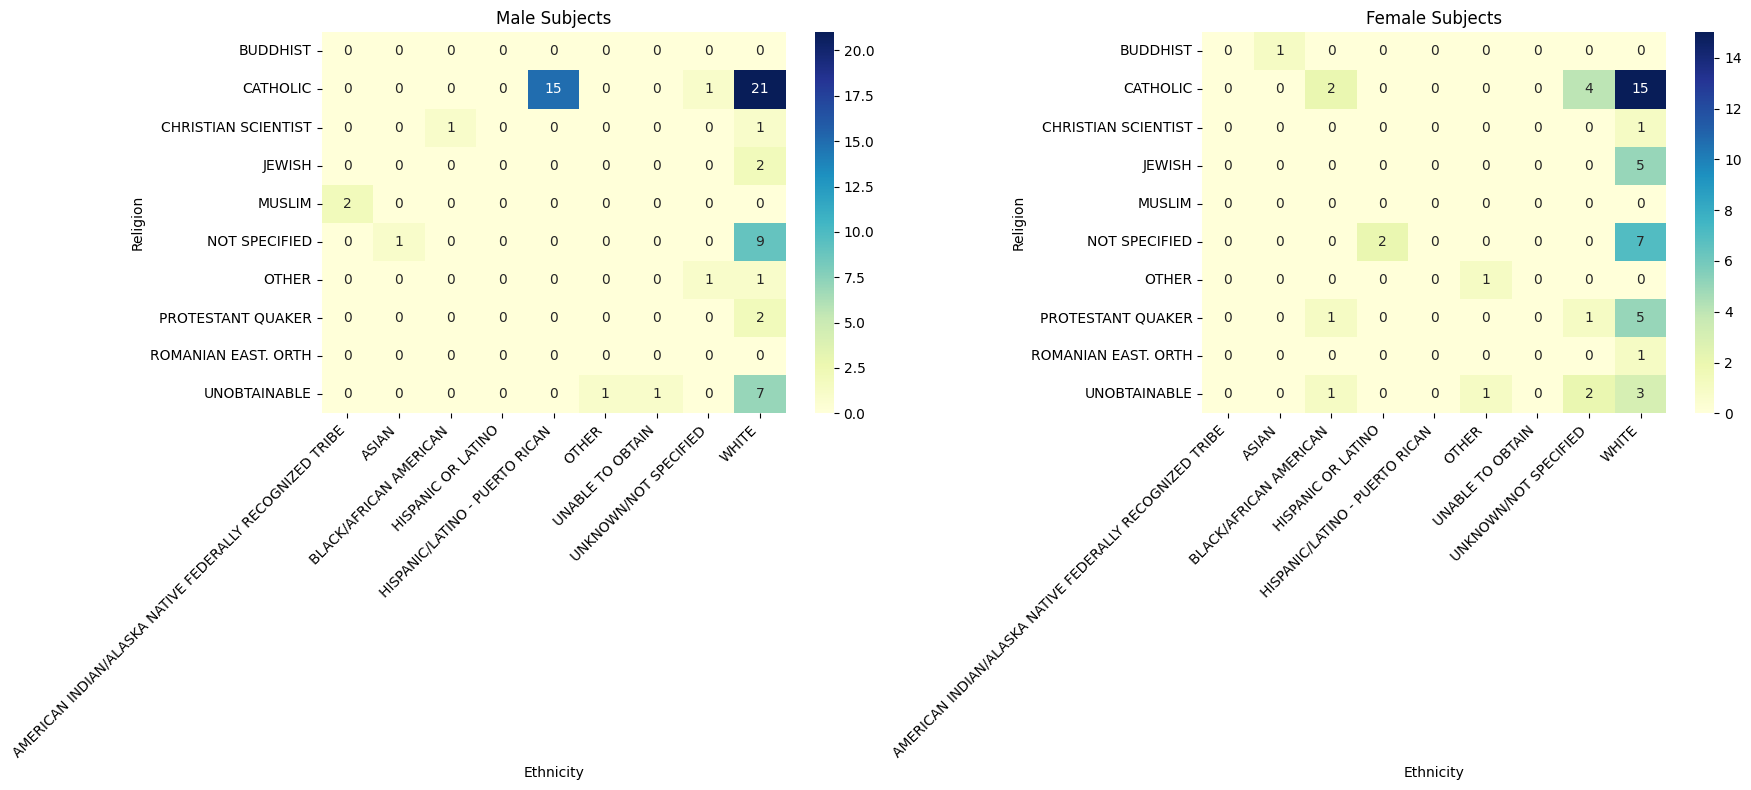

In [27]:
# Create a cross-tabulation of religion, ethnicity, and gender
cross_tab = pd.crosstab(index=[merged_data['religion'], merged_data['ethnicity']], columns=merged_data['gender'])

# Reset the index for better plot compatibility
cross_tab = cross_tab.reset_index()

# Melt the cross-tabulation for heatmaps
melted_cross_tab = pd.melt(cross_tab, id_vars=['religion', 'ethnicity'], value_vars=['M', 'F'], var_name='gender')

# Create separate heatmaps for male and female subjects using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Male Subjects Heatmap
male_pivot = melted_cross_tab[melted_cross_tab['gender'] == 'M'].pivot_table(index='religion', columns='ethnicity', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(male_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Male Subjects")
axes[0].set_xlabel("Ethnicity")
axes[0].set_ylabel("Religion")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Female Subjects Heatmap
female_pivot = melted_cross_tab[melted_cross_tab['gender'] == 'F'].pivot_table(index='religion', columns='ethnicity', values='value', aggfunc='sum', fill_value=0)
sns.heatmap(female_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Female Subjects")
axes[1].set_xlabel("Ethnicity")
axes[1].set_ylabel("Religion")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Patients, Admissions, and Diagnosis_icd Tables

In [ ]:
# Convert the DataFrame to a dictionary to link icd9 codes to respective labels
icd9_dict = diagnoses_labels.set_index('icd9_code')['short_title'].to_dict()

# Print the dictionary
print(icd9_dict)

{'01716': 'Erythem nod tb-oth test', '01720': 'TB periph lymph-unspec', '01721': 'TB periph lymph-no exam', '01722': 'TB periph lymph-exam unk', '01723': 'TB periph lymph-micro dx', '01724': 'TB periph lymph-cult dx', '01725': 'TB periph lymph-histo dx', '01726': 'TB periph lymph-oth test', '01730': 'TB of eye-unspec', '01731': 'TB of eye-no exam', '01732': 'TB of eye-exam unkn', '01733': 'TB of eye-micro dx', '01734': 'TB of eye-cult dx', '01735': 'TB of eye-histo dx', '01736': 'TB of eye-oth test', '01740': 'TB of ear-unspec', '01741': 'TB of ear-no exam', '01742': 'TB of ear-exam unkn', '01743': 'TB of ear-micro dx', '01744': 'TB of ear-cult dx', '01745': 'TB of ear-histo dx', '01746': 'TB of ear-oth test', '01750': 'TB of thyroid-unspec', '01751': 'TB of thyroid-no exam', '01752': 'TB of thyroid-exam unkn', '01753': 'TB of thyroid-micro dx', '01754': 'TB of thyroid-cult dx', '01755': 'TB of thyroid-histo dx', '01756': 'TB of thyroid-oth test', '01760': 'TB of adrenal-unspec', '0176

Creating a dictionary instead of joining two tables is more efficient. However, the impact depends on several factors. Proper indexing, query optimization, and consideration of your specific database system and hardware resources can help mitigate performance issues when joining tables, whereas creating a dictionary is easier and efficient as it uses the concept of hashing.

In [ ]:
# Merge diagnosis_icd with admissions on subject_id
merged_data_diagnosis = pd.merge(merged_data, diagnoses, on='subject_id', how='inner')

# Get the top diagnosis codes for each gender
top_diagnosis_codes_male = merged_data_diagnosis[merged_data_diagnosis['gender'] == 'M']['icd9_code'].value_counts().head(10)
top_diagnosis_codes_female = merged_data_diagnosis[merged_data_diagnosis['gender'] == 'F']['icd9_code'].value_counts().head(10)

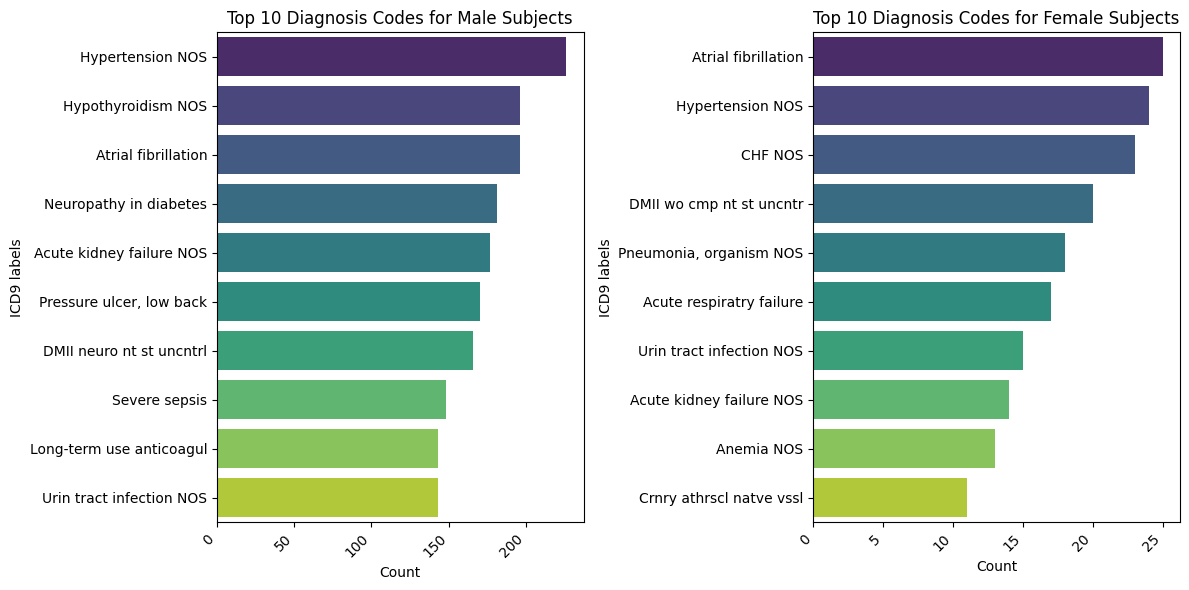

In [ ]:
# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Subplot for Male Subjects
plt.subplot(1, 2, 1)
sns.barplot(x=top_diagnosis_codes_male.values, y=top_diagnosis_codes_male.index, palette='viridis')
plt.title("Top 10 Diagnosis Codes for Male Subjects")
plt.xlabel("Count")
plt.ylabel("ICD9 labels")
plt.xticks(rotation=45, ha='right')

# Label the x-axis ticks with short titles
male_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_male.index]
plt.yticks(range(10), male_short_titles)

# Subplot for Female Subjects
plt.subplot(1, 2, 2)
sns.barplot(x=top_diagnosis_codes_female.values, y=top_diagnosis_codes_female.index, palette='viridis')
plt.title("Top 10 Diagnosis Codes for Female Subjects")
plt.xlabel("Count")
plt.ylabel("ICD9 labels")
plt.xticks(rotation=45, ha='right')

# Label the x-axis ticks with short titles
female_short_titles = [icd9_dict[code] for code in top_diagnosis_codes_female.index]
plt.yticks(range(10), female_short_titles)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The above plots can be visualized using another python library Plotly. The plots are more interactive and easy to visualize

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Create a DataFrame for male and female diagnosis codes
male_df = pd.DataFrame({'icd9_code': top_diagnosis_codes_male.index, 'count': top_diagnosis_codes_male.values})
female_df = pd.DataFrame({'icd9_code': top_diagnosis_codes_female.index, 'count': top_diagnosis_codes_female.values})

# Map ICD-9 codes to short titles
male_df['labels'] = male_df['icd9_code'].map(icd9_dict)
female_df['labels'] = female_df['icd9_code'].map(icd9_dict)

# Create a new column 'hover_text' that combines 'icd9_code', 'labels', and 'count'
male_df['hover_text'] = male_df['icd9_code'] + '<br>Disease name: ' + male_df['labels'] + '<br>ICD-9 Code: ' + male_df['icd9_code'] + '<br>Count: ' + male_df['count'].astype(str)
female_df['hover_text'] = female_df['icd9_code'] + '<br>Disease name: ' + female_df['labels'] + '<br>ICD-9 Code: ' + female_df['icd9_code'] + '<br>Count: ' + female_df['count'].astype(str)

# Create treemaps using Plotly Graph Objects with custom hover data and template
fig_male = go.Figure(go.Treemap(
    labels=male_df['labels'],
    parents=[''] * len(male_df),  # Set parent to empty string to remove parent levels
    values=male_df['count'],
    customdata=male_df[['icd9_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_male.update_layout(title='Top 10 Diagnosis Codes for Male Subjects')

fig_female = go.Figure(go.Treemap(
    labels=female_df['labels'],
    parents=[''] * len(female_df),  # Set parent to empty string to remove parent levels
    values=female_df['count'],
    customdata=female_df[['icd9_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_female.update_layout(title='Top 10 Diagnosis Codes for Female Subjects')

# Show the treemaps
fig_male.show()
fig_female.show()


##Time series plots

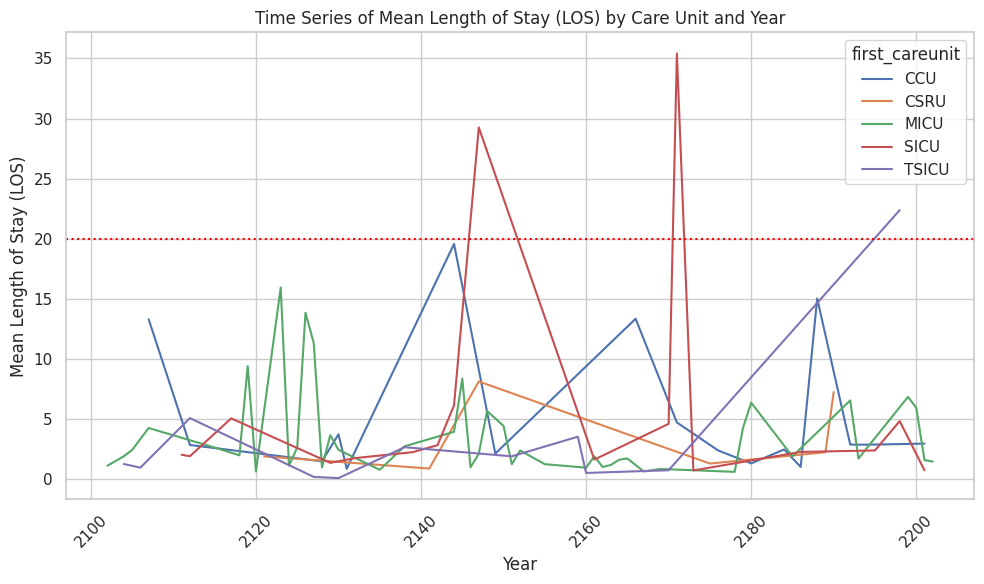

In [ ]:
icustays['intime'] = pd.to_datetime(icustays['intime'])
icustays['outtime'] = pd.to_datetime(icustays['outtime'])

# Extract the year from 'intime'
icustays['intime_year'] = icustays['intime'].dt.year

# Calculate the mean LOS for each care unit and year
los_stats = icustays.groupby(['first_careunit', 'intime_year'])['los'].mean().reset_index()

# Plot the time series of mean LOS by care unit and year
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(data=los_stats, x='intime_year', y='los', hue='first_careunit')

# Add a horizontal dotted line to identify the threshold
threshold = 20  # Set your threshold value here
plt.axhline(y=threshold, color='red', linestyle='dotted', label=f'Threshold ({threshold})')

plt.title("Time Series of Mean Length of Stay (LOS) by Care Unit and Year")
plt.xlabel("Year")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create an interactive line plot using Plotly Express
import plotly.express as px
fig = px.line(los_stats, x='intime_year', y='los', color='first_careunit',
              title='Time Series of Mean Length of Stay (LOS) by Care Unit and Year',
              labels={'intime_year': 'Year', 'los': 'Mean Length of Stay (LOS)'},
              template='plotly_white')

# Add a horizontal line to indicate the threshold
fig.add_hline(y=threshold, line_dash="dash", line_color="red", annotation_text=f'Threshold ({threshold})')

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

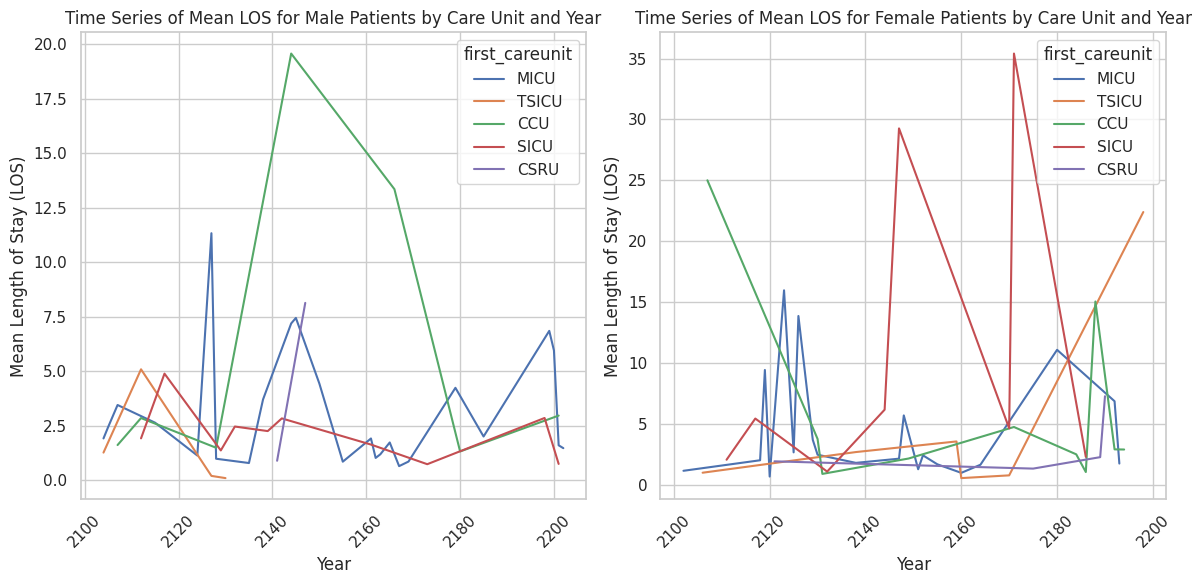

In [ ]:
# Merge icustays, admissions and patients on subject_id
merged_data_icu = pd.merge(icustays, merged_data, on='subject_id', how='inner')

# Extract the year from 'intime'
merged_data_icu['intime_year'] = merged_data_icu['intime'].dt.year

# Filter data for male and female patients
male_data = merged_data_icu[merged_data_icu['gender'] == 'M']
female_data = merged_data_icu[merged_data_icu['gender'] == 'F']

# Create separate time series plots for male and female patients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
sns.lineplot(data=male_data.groupby(['intime_year', 'first_careunit'])['los'].mean().reset_index(),
             x='intime_year', y='los', hue='first_careunit')
plt.title("Time Series of Mean LOS for Male Patients by Care Unit and Year")
plt.xlabel("Year")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
sns.lineplot(data=female_data.groupby(['intime_year', 'first_careunit'])['los'].mean().reset_index(),
             x='intime_year', y='los', hue='first_careunit')
plt.title("Time Series of Mean LOS for Female Patients by Care Unit and Year")
plt.xlabel("Year")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##Scatterplot

Jointplot is primarily used to visualize the relationship between two numeric variables.

Jointplot is typically used to visualize the interaction between two variables and doesn't involve grouping or categorization.

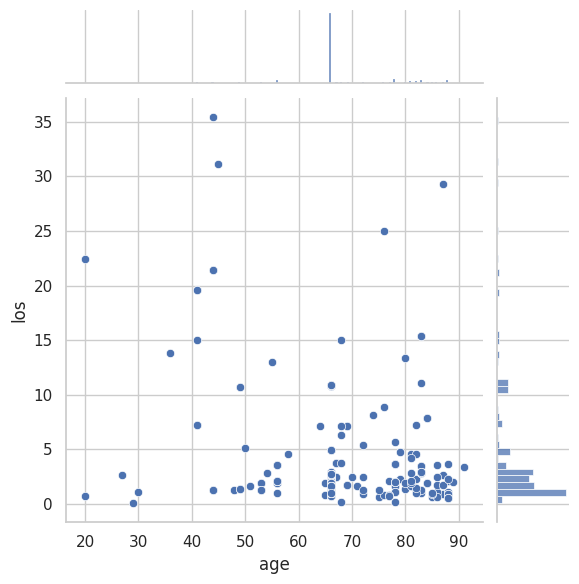

In [ ]:
# Create a joint plot using Seaborn
sns.set(style="whitegrid")
sns.jointplot(data=merged_data_icu, x='age', y='los', kind='scatter')
plt.show()

FacetGrid is used for creating a grid of subplots, where each subplot represents a subset of the data based on one or more categorical variables.

FacetGrid allows you to compare different groups or categories within your data and see how relationships or distributions vary across them.

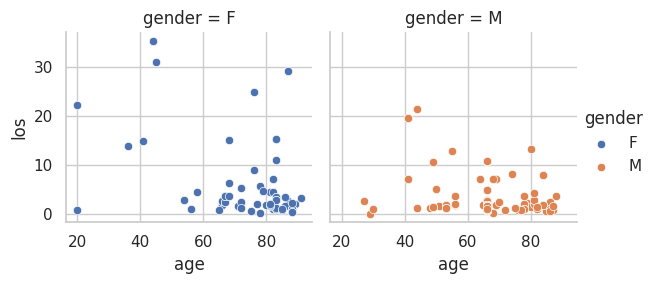

In [ ]:
# Create a facet grid of joint plots for each gender
g = sns.FacetGrid(merged_data_icu, col='gender', hue='gender')
g.map(sns.scatterplot, 'age', 'los')
g.add_legend()
plt.show()

In summary, jointplot is used to visualize the relationship between two numeric variables, whereas FacetGrid is used to create a grid of subplots for comparing relationships or distributions within different categorical groups. The choice between the two depends on whether you're focusing on the relationship between two variables (for jointplot) or exploring different aspects of your data across categories (for FacetGrid).